In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy import stats
import seaborn as sns
from abc import ABC,abstractmethod

## Binomial distribution
La distribución binomial se utiliza para obtener la probabilidad de observar x éxitos en N ensayos, con la probabilidad de éxito en un solo ensayo denotado por p.

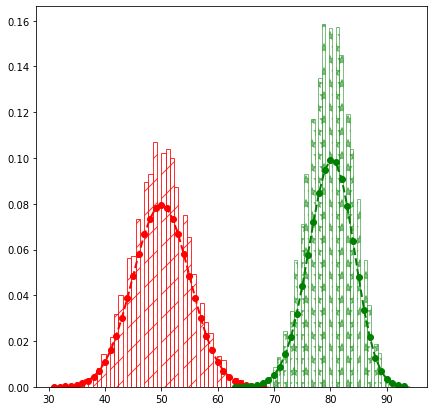

<AxesSubplot:>

In [34]:
binomial_plots =  (
    BinomialDistributionPlot({'n':100,'p':0.5,'size':10000,'loc':0},red_style),  
    BinomialDistributionPlot({'n':100,'p':0.8,'size':10000,'loc':0},green_style),  
)
plot_pdistribution(
    distribution_plots = binomial_plots, 
    show_fx   = True,
    fig_size = (7,7)
)

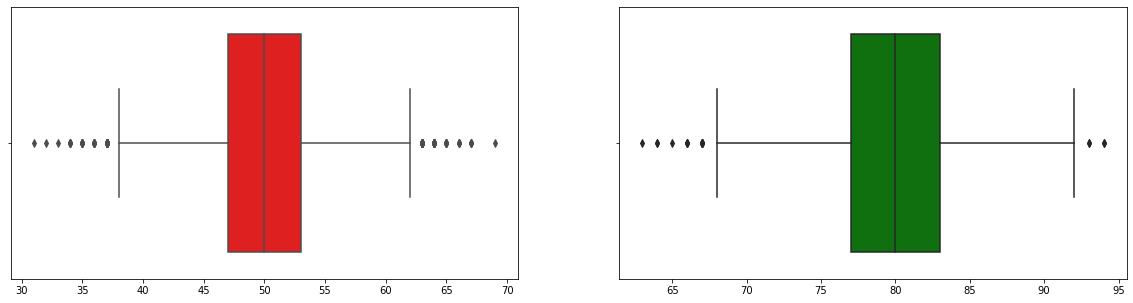

In [35]:
boxplot_pd(binomial_plots)

In [36]:
getStatsFromPlots(binomial_plots)

,mean,median,variance,std
0,50.0,50.0,25.0,5.0
1,80.0,80.0,16.0,4.0


## Poisson distribution
La distribución de Poisson se utiliza para modelar el número de eventos que ocurren dentro de un intervalo de tiempo dado.

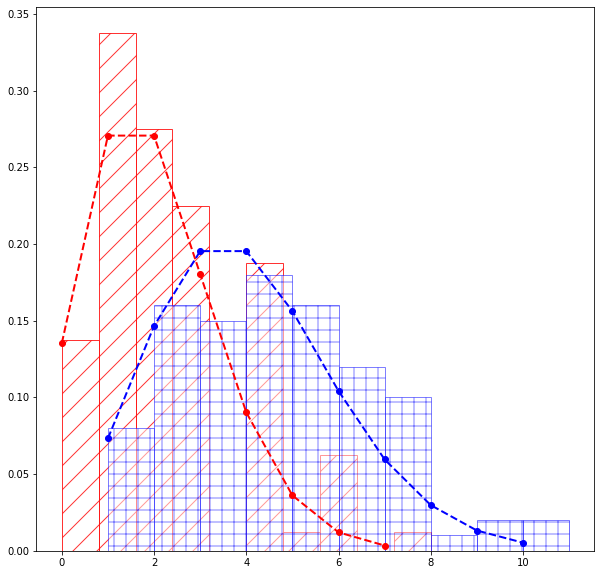

<AxesSubplot:>

In [41]:
poisson_plots = (
    PoissonDistributionPlot({'size':100,'mu':2,'loc':0},red_style),
    PoissonDistributionPlot({'size':100,'mu':4,'loc':0},blue_style),
#     PoissonDistributionPlot({'size':100,'mu':10,'loc':0},green_style),
)
plot_pdistribution(
    distribution_plots = poisson_plots,
    show_fx            = True, 
    bins               = 10
)

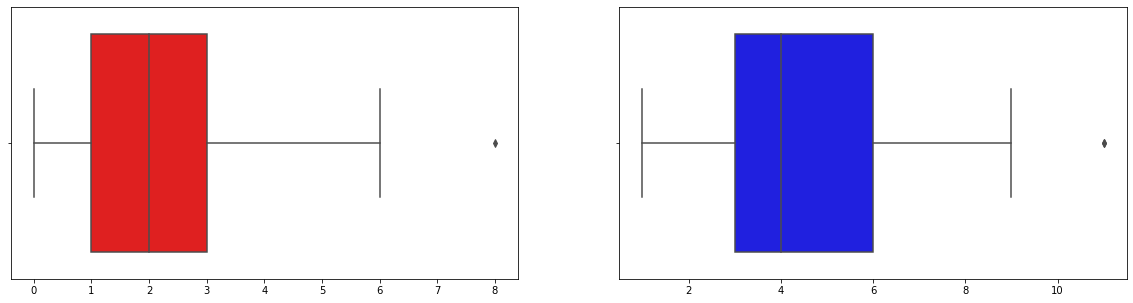

In [42]:
boxplot_pd(poisson_plots)

In [44]:
getStatsFromPlots(poisson_plots)

,mean,median,variance,std
0,2.0,2.0,2.0,1.414214
1,4.0,4.0,4.0,2.000000


## Guassian distribution
Tanto por razones teóricas como prácticas, la distribución normal es probablemente la distribución más importante en estadística.

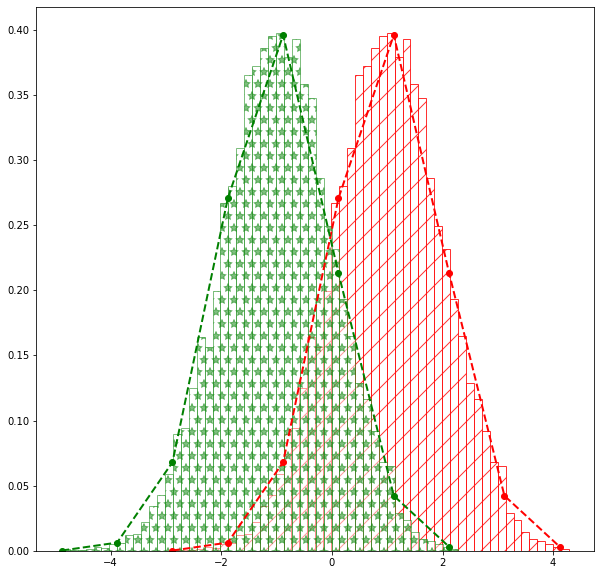

<AxesSubplot:>

In [47]:
normal_plots = (
    GaussianDistributionPlot({'size':10000,'loc':1,'scale':1},red_style),
#     GaussianDistributionPlot({'size':10000,'loc':1,'scale':2},pink_style),
    GaussianDistributionPlot({'size':10000,'loc':-1,'scale':1},green_style),
#     GaussianDistributionPlot({'size':10000,'loc':-1,'scale':2},blue_style),
)
plot_pdistribution(
    distribution_plots = normal_plots,
    show_fx   = True
)

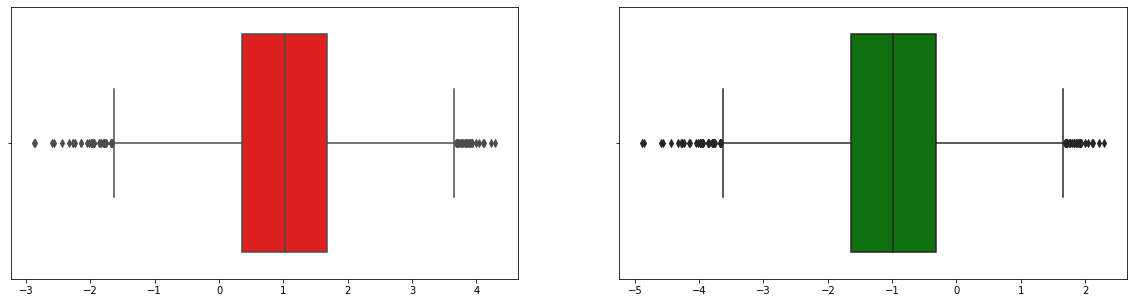

In [48]:
boxplot_pd(normal_plots)

In [49]:
getStatsFromPlots(normal_plots)

,mean,median,variance,std
0,1.0,1.0,1.0,1.0
1,-1.0,-1.0,1.0,1.0


## T-distribution
La distribución t se utiliza para las pruebas de hipótesis y para determinar los intervalos de confianza.

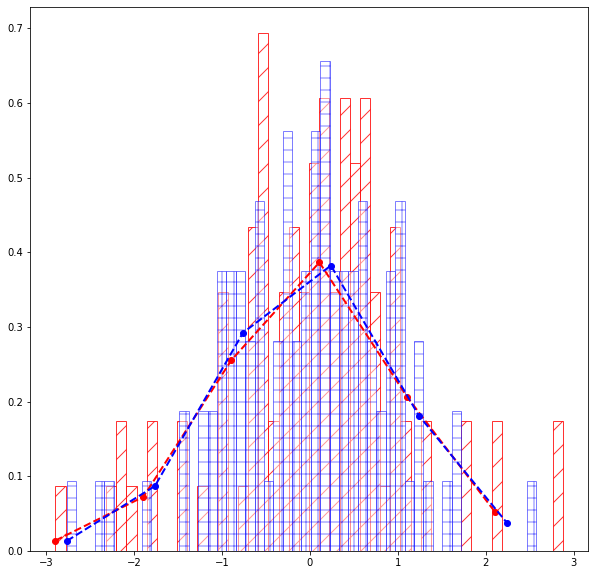

<AxesSubplot:>

In [53]:
# %matplotlib notebook 
%matplotlib inline
t_plots = (
    TDistributionPlot({'size':100,'df':10,'loc':0,'scale':1},red_style),
    TDistributionPlot({'size':100,'df':20,'loc':0,'scale':1},blue_style),
#     TDistributionPlot({'size':100,'df':50,'loc':0,'scale':1},green_style),
#     TDistributionPlot({'size':100,'df':100,'loc':0,'scale':1},black_style),
)
plot_pdistribution(
    distribution_plots = t_plots,
    show_fx   = True
)

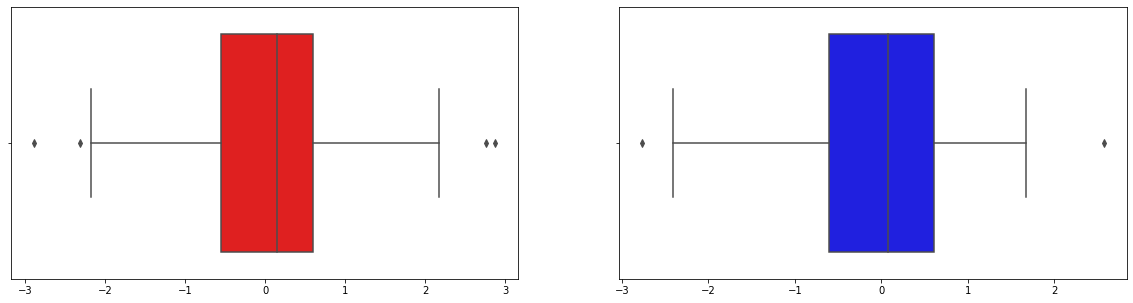

In [54]:
boxplot_pd(t_plots)

In [55]:
getStatsFromPlots(t_plots)

,mean,median,variance,std
0,0.0,6.805748e-17,1.250000,1.118034
1,0.0,6.721451e-17,1.111111,1.054093


## Chi-squared distribution
La distribución chi-squared se utiliza para las pruebas de hipótesis y para determinar los intervalos de confianza.

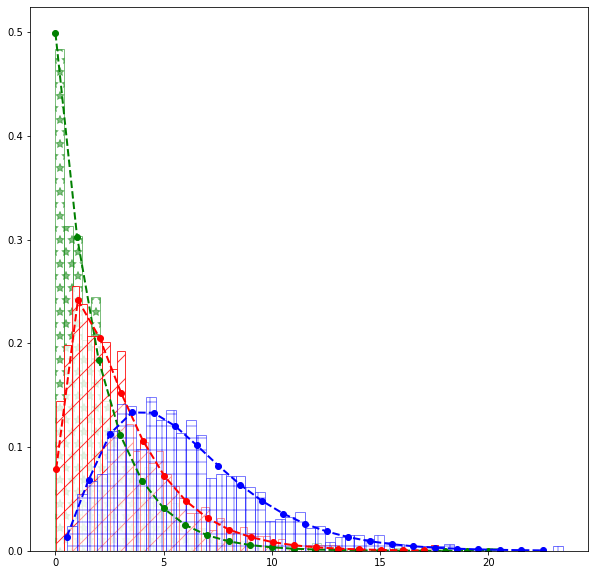

<AxesSubplot:>

In [58]:
# %matplotlib notebook 
%matplotlib inline
chi2_plots = (
   Chi2DistributionPlot({'size':1000,'df':2,'loc':0,'scale':1},green_style) ,
   Chi2DistributionPlot({'size':1000,'df':3,'loc':0,'scale':1},red_style) ,
   Chi2DistributionPlot({'size':1000,'df':6,'loc':0,'scale':1},blue_style) ,
#    Chi2DistributionPlot({'size':1000,'df':3,'loc':1,'scale':1},red_style) ,
#    Chi2DistributionPlot({'size':1000,'df':4,'loc':1,'scale':1},red_style) ,
)
plot_pdistribution(
    distribution_plots = chi2_plots,
    show_fx   = True
)

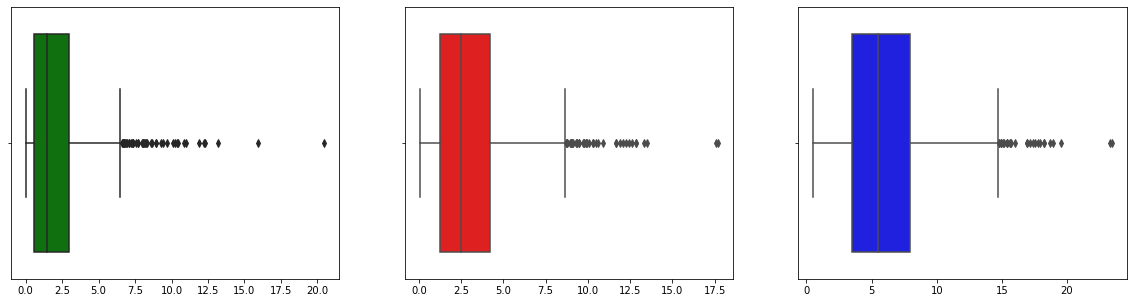

In [59]:
boxplot_pd(chi2_plots)

In [60]:
getStatsFromPlots(chi2_plots)

,mean,median,variance,std
0,2.0,1.386294,4.0,2.000000
1,3.0,2.365974,6.0,2.449490
2,6.0,5.348121,12.0,3.464102


## F - distribution

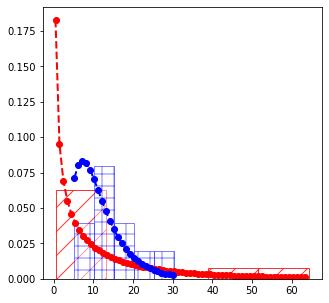

<AxesSubplot:>

In [72]:
size = 10 
f_plots = (
    FDistributionPlot({'size':size,'dfn':1,'dfd':10,'loc':0,'scale':10},red_style),
    FDistributionPlot({'size':size,'dfn':10,'dfd':20,'loc':0,'scale':10},blue_style),
)
plot_pdistribution(
    distribution_plots = f_plots,
    show_fx            = True ,
    fig_size = (5,5),
    bins=5
)

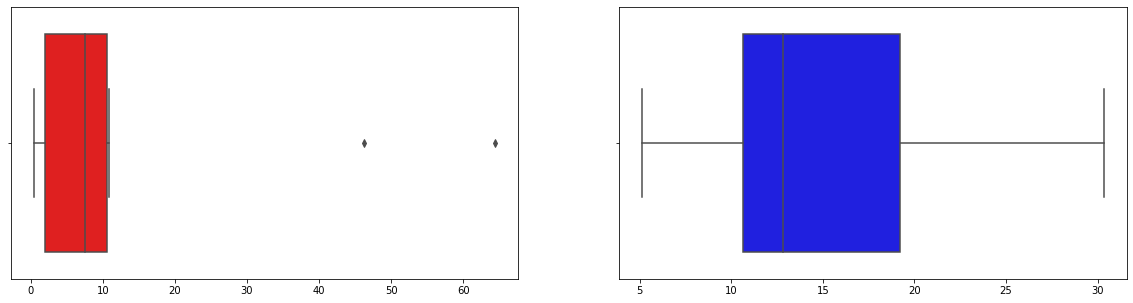

In [73]:
boxplot_pd(f_plots)

In [74]:
getStatsFromPlots(f_plots)

,mean,median,variance,std
0,12.500000,4.897369,468.750000,21.650635
1,11.111111,9.662639,43.209877,6.573422


# Utils

In [37]:
def plot_pdistribution(**kwargs):
    distributions = kwargs.get("distribution_plots",[])
    show_fx       = kwargs.get("show_fx",False) 
    fig_size      = kwargs.get("fig_size",(10,10))
    bins          = kwargs.get("bins",50)
    _,ax          = plt.subplots(figsize=fig_size)
    if(show_fx):
        ys = list( map( lambda d: d.fx(d.x),distributions ))
        for d,y in zip(distributions,ys):
            ax.plot(d.x,y,color=d.style['edgecolor'],ls ="--",lw=2,marker="o")
    for d in distributions:
        ax.hist(d.data,**d.style,bins=bins,density=True)
    plt.show()
    return ax

In [61]:

def Vector(*args):
    return np.array(args)
default_style = lambda c : {**c,'color':'white'}

def getStatsFromD(__d):
    return (__d.mean(),__d.median(),__d.var(),__d.std())

def getStatsFromPlots(ds):
    data = {'mean':[],'median':[],'variance':[],'std':[]}
    for d in ds:
        [mean,median,variance,std] = d.stats()
        data['mean'].append(mean)
        data['median'].append(median)
        data['variance'].append(variance)
        data['std'].append(std)
    return pd.DataFrame(data)

class PDistributionPlot(ABC):
    def __init__(self,params,style):
        self.params = params
        self.style  = style
        self.random_state = np.random.RandomState(1234)
        
    @abstractmethod
    def fx(self,x):
        pass
    @abstractmethod
    def random(self):
        pass
    @abstractmethod
    def stats(self):
        pass
class BinomialDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.binom
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        self.__d          = self.distribution(self.params['n'],self.params['p'],loc=self.params['loc'])
        
    def fx(self,x):
        return self.distribution.pmf(x,n = self.params['n'],p=self.params['p'])
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
    def stats(self):
        return getStatsFromD(self.__d)
#         return (self.__d.mean(),self.__d.median(),self.__d.var(),self.__d.std())
#     
class PoissonDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.poisson
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        self.__d          = self.distribution(self.params['mu'],loc=self.params['loc'])
        
    def fx(self,x):
        return self.distribution.pmf(x,
                                     self.params['mu'],
                                     loc = self.params['loc']
                                    )
    def random(self):
        return self.distribution.rvs(self.params['mu'],
                                     loc=self.params['loc'],
                                     size=self.params['size'],
                                     random_state=self.random_state)
    def stats(self):
        return getStatsFromD(self.__d)
#     
class GaussianDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.norm
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        self.__d          = self.distribution(loc=self.params['loc'],scale=self.params['scale'])
        
    def fx(self,x):
        return self.distribution.pdf(x,loc=self.params['loc'],scale=self.params['scale']  )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
    def stats(self):
        return getStatsFromD(self.__d)
    
class TDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.t
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        self.__d          = self.distribution(self.params['df'],loc=self.params['loc'],scale=self.params['scale'])
    def fx(self,x):
        return self.distribution.pdf(x,
                                     self.params['df'],
                                     loc=self.params['loc'],
                                     scale=self.params['scale']
                                    )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
    def stats(self):
        return getStatsFromD(self.__d)
class Chi2DistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.chi2
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        self.__d          = self.distribution(self.params['df'],loc=self.params['loc'],scale=self.params['scale'])
    def fx(self,x):
        return self.distribution.pdf(x,self.params['df'],loc=self.params['loc'],scale=self.params['scale'])
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
    def stats(self):
        return getStatsFromD(self.__d)
class FDistributionPlot(PDistributionPlot):
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs) 
        self.distribution = stats.f
        self.data         = self.random() 
        self.x            = np.arange(self.data.min(), self.data.max())
        self.__d          = self.distribution(self.params['dfn'],
                                              self.params['dfd'],
                                              loc=self.params['loc'],
                                              scale=self.params['scale']
                                             )
    def fx(self,x):
        
        return self.distribution.pdf(x,dfn  = self.params['dfn'],
                                     dfd  = self.params['dfd'],
                                     loc=self.params['loc'],
                                     scale=self.params['scale']
                                    )
    def random(self):
        return self.distribution.rvs(**self.params,random_state=self.random_state)
    def stats(self):
        return getStatsFromD(self.__d)
def boxplot_pd(ds):
    _,ax = plt.subplots(1,len(ds),figsize=(20,5))
    if(len(ds) == 1 ):
        sns.boxplot(x=ds[0].data,ax=ax,color=ds[0].style['edgecolor'])
        return
    for i,d in enumerate(ds):
        sns.boxplot(x=d.data,ax=ax[i],color=d.style['edgecolor'])
red_style = default_style({'edgecolor':"red","hatch":"/",'alpha':.8})
green_style = default_style({'edgecolor':"green","hatch":"*",'alpha':.5})
black_style = default_style({'edgecolor':"black","hatch":".",'alpha':.5})
blue_style = default_style({'edgecolor':"blue","hatch":"+",'alpha':.5})
pink_style = default_style({'edgecolor':"pink","hatch":"O",'alpha':.5})